<a href="https://colab.research.google.com/github/abuwildanm/Heart-Disease/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Classification**

## Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Shape of Data : ', data.shape)

Shape of Data :  (303, 14)


In [5]:
print("Number of target variable : ", data['target'].nunique())

Number of target variable :  2


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

**1. Warming up**

Frequency distribution of **target** variable 

(0 : Absence of heart disease, 1 : Presence of heart disease)

In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

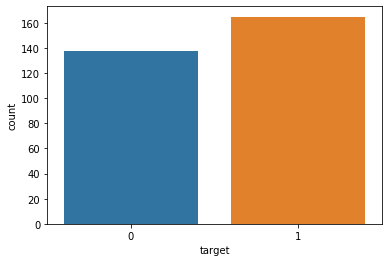

In [8]:
sns.countplot(x = "target", data = data)
plt.show()

In [9]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

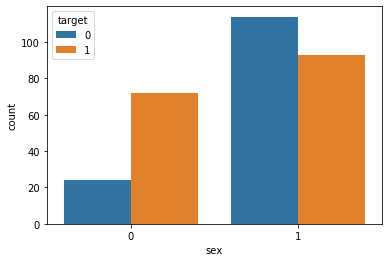

In [10]:
sns.countplot(x = "sex", hue = "target", data = data)
plt.show()

**2. Estimating correlation coefficient**

In [11]:
correlation = data.corr()
correlation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

As we can see that the **cp** and **thalach** variables are mildly positively correlated with **target** variable. 

So, We will analyze the interaction between these features and **target** variable

Frequency distribution of **cp**

**cp** stands for chest pain type (4 values)

In [12]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

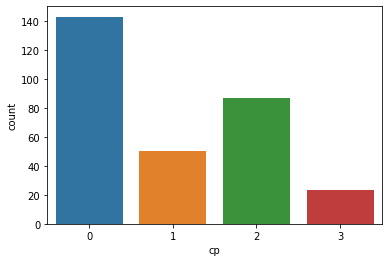

In [13]:
sns.countplot(x = "cp", data = data)
plt.show()

Analysis of **cp** and **target** variable

In [14]:
data.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

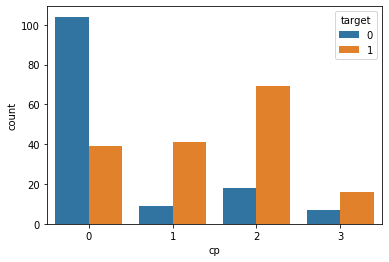

In [15]:
sns.countplot(x = "cp", hue = "target", data = data)
plt.show()

Explore **thalach** variable


**thalach** stands for maximum heart rate achieved

In [16]:
data['thalach'].nunique()

91

Analysis of **thalach** and **target** variable

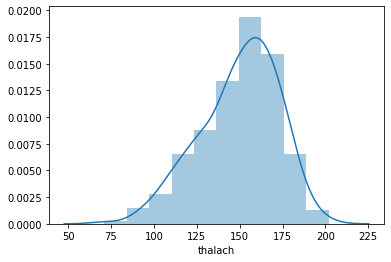

In [17]:
sns.distplot(data['thalach'], bins = 10)
plt.show()

From the above plot, We can see that the **thalach** variable is slightly negatively skewed

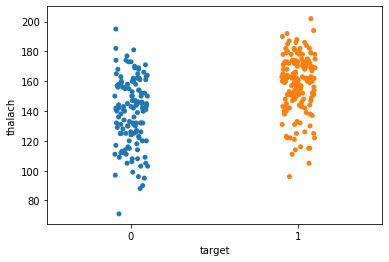

In [18]:
sns.stripplot(x = "target", y = "thalach", data = data)
plt.show()

From the above plot, We can see that people suffering from heart disease (target = 1) have relatively higher heart rate (**thalach**) as compared to people who are not suffering from heart disease (target = 0)

**3. Discovering Pattern and Relationship in Dataset**

Heat Map

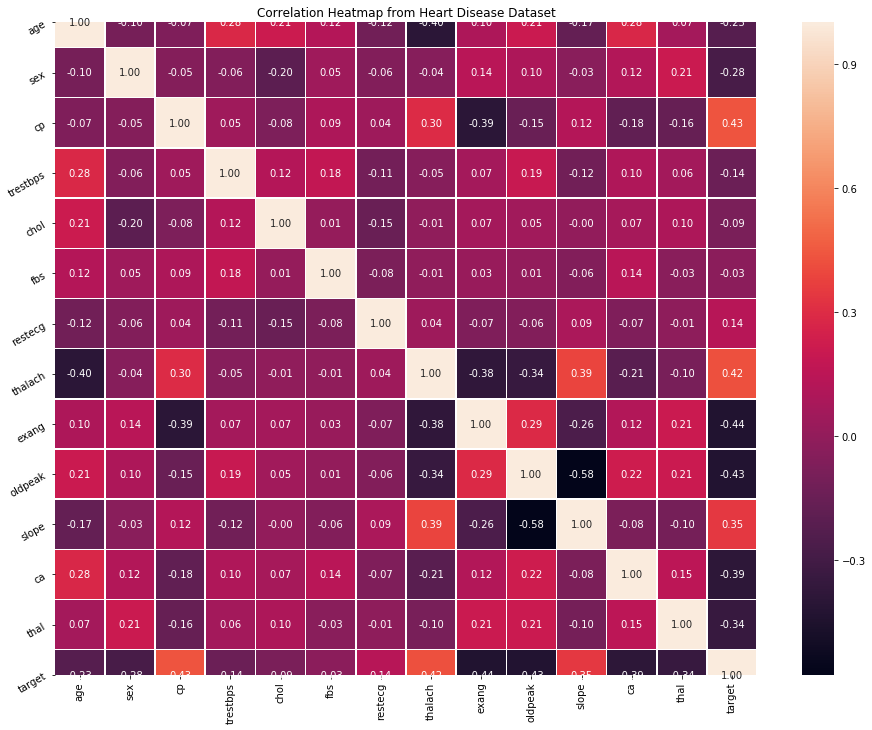

In [19]:
plt.figure(figsize = (16,12))
plt.title('Correlation Heatmap from Heart Disease Dataset')
a = sns.heatmap(correlation, square = True, annot = True, fmt = '.2f', linewidths = .5)
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set_yticklabels(a.get_yticklabels(), rotation = 30)           
plt.show()

Pair Plot

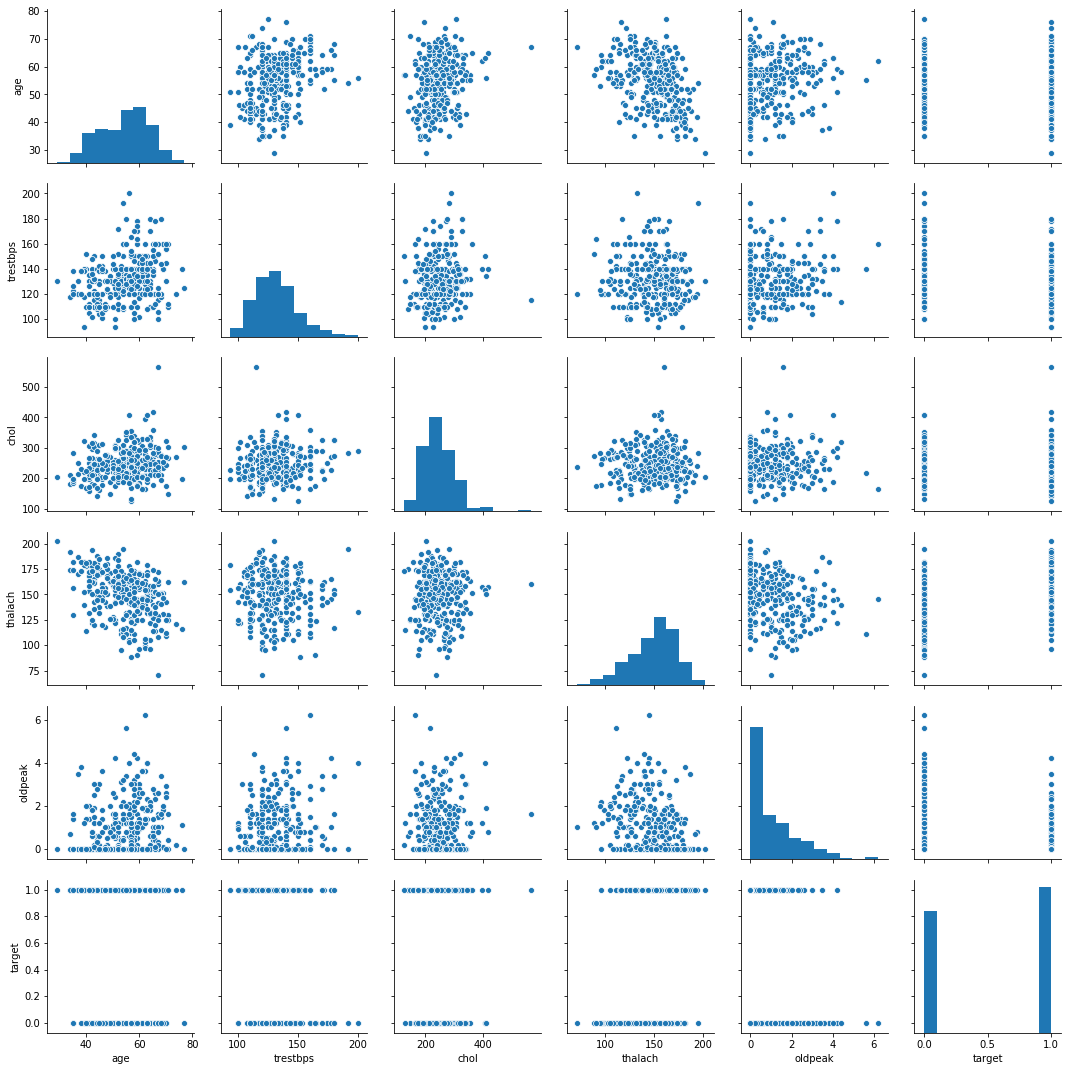

In [20]:
var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[var], kind = 'scatter', diag_kind = 'hist')
plt.show()

## Preprocessing